In [17]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

In [18]:
def h(x, theta):
    return np.dot(x, theta)

In [19]:
def mean_squared_error(y_predicted, y_label):
    return 1/y_predicted.shape[1] * np.sum(np.square(y_predicted-y_label))

In [20]:
class LeastSquaresRegression:
    def __init__(self,):
        self.theta_ = None
        
    def fit(self, X, y):
        transpose = np.array(X).T
        self.theta_ = np.linalg.inv(np.dot(transpose, X)).dot(transpose).dot(y)
    
    def predict(self, X):
        return h(X, theta=self.theta_)

In [21]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

In [22]:
def bias_column(X):
    return np.c_[np.ones(X.shape[0]), X]

In [23]:
X_new = bias_column(X)

In [24]:
model = LeastSquaresRegression()
model.fit(X_new, y)

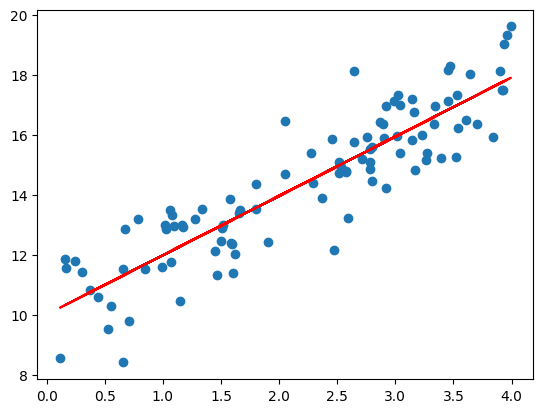

In [25]:
y_new = model.predict(X_new)
def my_plot(X, y, y_new):
    plt.scatter(X, y)
    plt.plot(X, y_new, color='red')
    plt.show()

my_plot(X, y, y_new)

In [26]:
class GradientDescentOptimizer:
    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_ = f             
        self.fprime_ = fprime      
        self.current_ = start    
        self.learning_rate_ = learning_rate    
        self.history_ = [start]
    
    def step(self):
        self.current_ = self.current_ - np.dot(self.learning_rate_, fprime(self.current_))
        self.history_.append(self.current_)
    
    
    def optimize(self, iterations = 100):
        for _ in range(iterations):
            self.step()
        
    def getCurrentValue(self):
        return self.current_
    
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

In [27]:
def f(x):
    return 3 + np.dot((x[0] - np.array([2, 6]).T).T, (x[1] - np.array([2, 6]).T))

In [28]:
def fprime(x):
    return np.array(2 * (x[0] - 2), 2 * (x[1] - 6))

In [29]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.70196838 3.0671218 ]
Value of f at this theta: f(theta) = 15.287567190087254
Value of f prime at this theta: f'(theta) = -0.5960632437260123


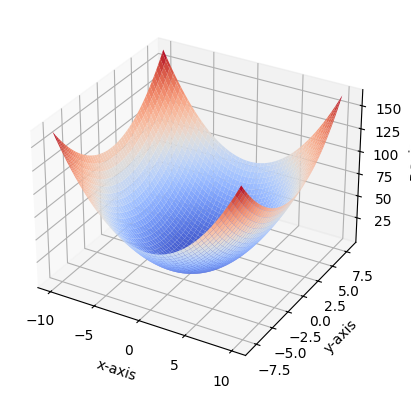

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-10, 10, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

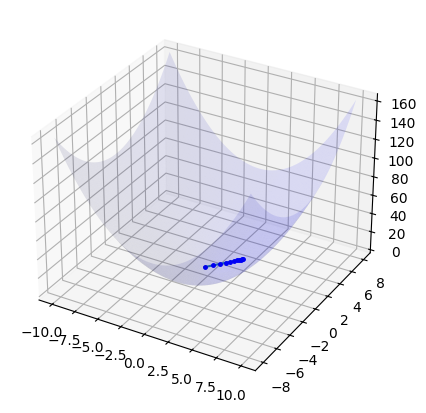

In [31]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5)
plt.show()